<a href="https://colab.research.google.com/github/Mart1n2015/CODERHOUSE-DSIII/blob/main/TRABAJO%20MARTIN%20CERIOLI%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS DE SENTIMIENTO DE TWITTER Y SU REPERCUCUON EN EL MERCADO ACCIONARIO**

*Introduccion*

El presente trabajo tiene como objetivo analizar si existe una relación entre los comentarios sobre compañías publicados en la red social Twitter y su impacto en el precio de sus acciones. Para ello, se utilizará un dataset obtenido de la plataforma Kaggle (https://www.kaggle.com/), el cual será sometido a un proceso de exploración y análisis inicial.

Posteriormente, se realizará un análisis de los tweets mediante técnicas de Procesamiento del Lenguaje Natural (NLP), con el fin de extraer y cuantificar el sentimiento asociado a las menciones de las empresas. Finalmente, se aplicarán modelos de redes neuronales para evaluar la capacidad predictiva del sentimiento expresado en redes sociales sobre la variación en el precio del activo financiero.

*Hipotesis*

Los comentarios tanto negativo como positivos de las compañias en las redes sociales tienen impacto en el precio de las mismas.


Comenzamos importando las librerias con las quew vamos a trabajar.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
url_dataset = "https://raw.githubusercontent.com/Mart1n2015/CODERHOUSE-DSIII/refs/heads/main/reduced_dataset-release.csv"

In [ ]:
dataframe = pd.read_csv(url_dataset,sep=",", low_memory=False)

#EDA

Una vez importadas las librerias y los datos comenzamos a explorar los datos.

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143282 entries, 0 to 143281
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         124761 non-null  object 
 1   TWEET              143279 non-null  object 
 2   STOCK              85176 non-null   object 
 3   DATE               85176 non-null   object 
 4   LAST_PRICE         85176 non-null   float64
 5   1_DAY_RETURN       85176 non-null   float64
 6   2_DAY_RETURN       85176 non-null   float64
 7   3_DAY_RETURN       85176 non-null   float64
 8   7_DAY_RETURN       85176 non-null   float64
 9   PX_VOLUME          85176 non-null   float64
 10  VOLATILITY_10D     85171 non-null   float64
 11  VOLATILITY_30D     85165 non-null   float64
 12  LSTM_POLARITY      85175 non-null   object 
 13  TEXTBLOB_POLARITY  45594 non-null   object 
 14  MENTION            27073 non-null   object 
dtypes: float64(8), object(7)
memory usage: 16.4+ MB


Quitamos las filas que contengan datos nulos.

In [ ]:
processed_dataframe = dataframe.copy()
processed_dataframe = processed_dataframe.dropna(subset=['Unnamed: 0', 'STOCK'])

print(f"Shape of processed_dataframe after dropping nulls in 'Unnamed: 0' and 'STOCK': {processed_dataframe.shape}")
display(processed_dataframe.head(50))

Shape of processed_dataframe after dropping nulls in 'Unnamed: 0' and 'STOCK': (66655, 15)


,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,VOLATILITY_10D,VOLATILITY_30D,LSTM_POLARITY,TEXTBLOB_POLARITY,MENTION
2,1,@FAME95FM1 Jamaicans make money with @Payoneer...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
3,2,@CBSi Jamaicans make money with @Payoneer @Pay...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,1,0.0,@PayPal
4,3,@Hitz92fm Jamaicans make money with @Payoneer ...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
11,7,"RT @nikitakhara: Thank you, @Starbucks CEO for...",Starbucks,31/01/2017,55.2200,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,1,0.2,@Starbucks
20,12,@gawker Jamaicans make money with @Payoneer @P...,PayPal,31/01/2017,39.7800,0.002011,0.012318,0.012318,0.054801,9100057.0,18.769,16.099,-1,0.0,@PayPal
23,14,RT @cultcommoncore: Dumping @Starbucks\r\r\r\r...,Starbucks,31/01/2017,55.2200,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,-1,0.0,@Starbucks
26,16,@amazon has your back when it comes to food sh...,Amazon,31/01/2017,823.4800,0.008379,0.014924,0.014924,-0.001263,3137196.0,13.447,16.992,-1,0.0,@amazon
35,21,"RT @nia4_trump: So instead of hiring 10,000 un...",Starbucks,31/01/2017,55.2200,0.012314,0.016298,0.016298,0.058312,14307985.0,23.916,17.298,-1,0.0,@Starbucks
48,28,Hmmm interesting... \r\r\r\r\r\r\nonly @IBM ha...,Disney,31/01/2017,110.6500,0.002621,-0.012201,-0.012201,-0.024853,8485838.0,12.229,12.982,-1,0.25,@Disney
53,31,RT @IndiaHistorypic: 1994::Young @sundarpichai...,Google,31/01/2017,820.1900,0.004438,0.030286,0.030286,0.035772,2020180.0,21.549,14.953,-1,0.0,@Google


In [ ]:
dataframe = processed_dataframe

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66655 entries, 2 to 143279
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         66655 non-null  object 
 1   TWEET              66655 non-null  object 
 2   STOCK              66655 non-null  object 
 3   DATE               66655 non-null  object 
 4   LAST_PRICE         66655 non-null  float64
 5   1_DAY_RETURN       66655 non-null  float64
 6   2_DAY_RETURN       66655 non-null  float64
 7   3_DAY_RETURN       66655 non-null  float64
 8   7_DAY_RETURN       66655 non-null  float64
 9   PX_VOLUME          66655 non-null  float64
 10  VOLATILITY_10D     66655 non-null  float64
 11  VOLATILITY_30D     66644 non-null  float64
 12  LSTM_POLARITY      66655 non-null  object 
 13  TEXTBLOB_POLARITY  27073 non-null  object 
 14  MENTION            27073 non-null  object 
dtypes: float64(8), object(7)
memory usage: 8.1+ MB


Creamos gráficos para una mejor visualizacion de la información. Primero haremos un TOP de acciones mencionadas y luego un promedio de retorno para el primer dia por compañia.

/tmp/ipython-input-1438272937.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MENTION_COUNT', y='STOCK', data=top_15_stocks, palette='viridis')


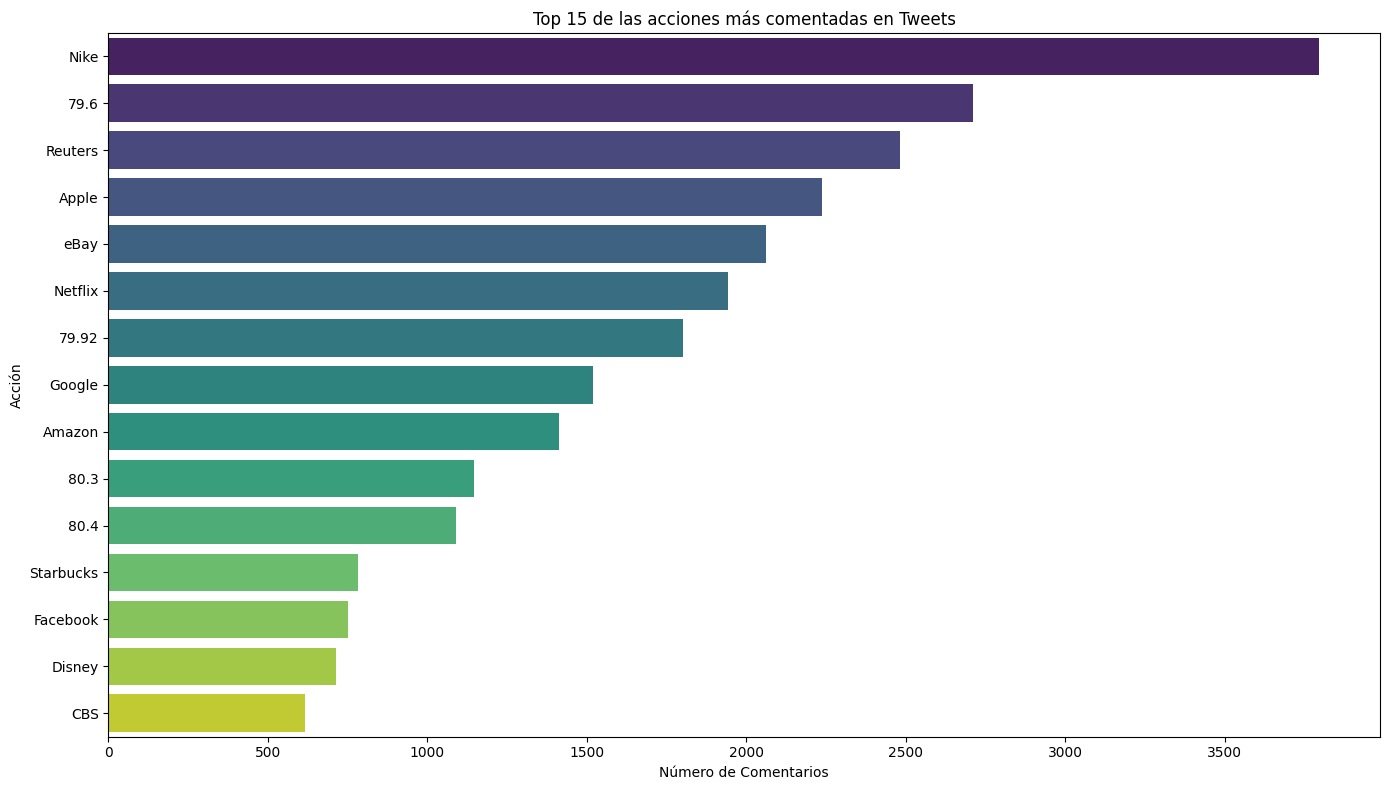

,STOCK,MENTION_COUNT
0,Nike,3797
1,79.6,2710
2,Reuters,2482
3,Apple,2238
4,eBay,2063
5,Netflix,1942
6,79.92,1801
7,Google,1518
8,Amazon,1412
9,80.3,1147


In [ ]:
# Creamos un grafico para verificar las 15 acciones mas mencionadas
stock_counts = dataframe['STOCK'].value_counts().reset_index()
stock_counts.columns = ['STOCK', 'MENTION_COUNT']

top_15_stocks = stock_counts.head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x='MENTION_COUNT', y='STOCK', data=top_15_stocks, palette='viridis')
plt.title('Top 15 de las acciones más comentadas en Tweets')
plt.xlabel('Número de Comentarios')
plt.ylabel('Acción')
plt.tight_layout()
plt.show()

display(top_15_stocks)

/tmp/ipython-input-1298556767.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='1_DAY_RETURN', y='STOCK', data=average_returns.head(20), palette='coolwarm') # Mostrar las 20 principales para mayor claridad


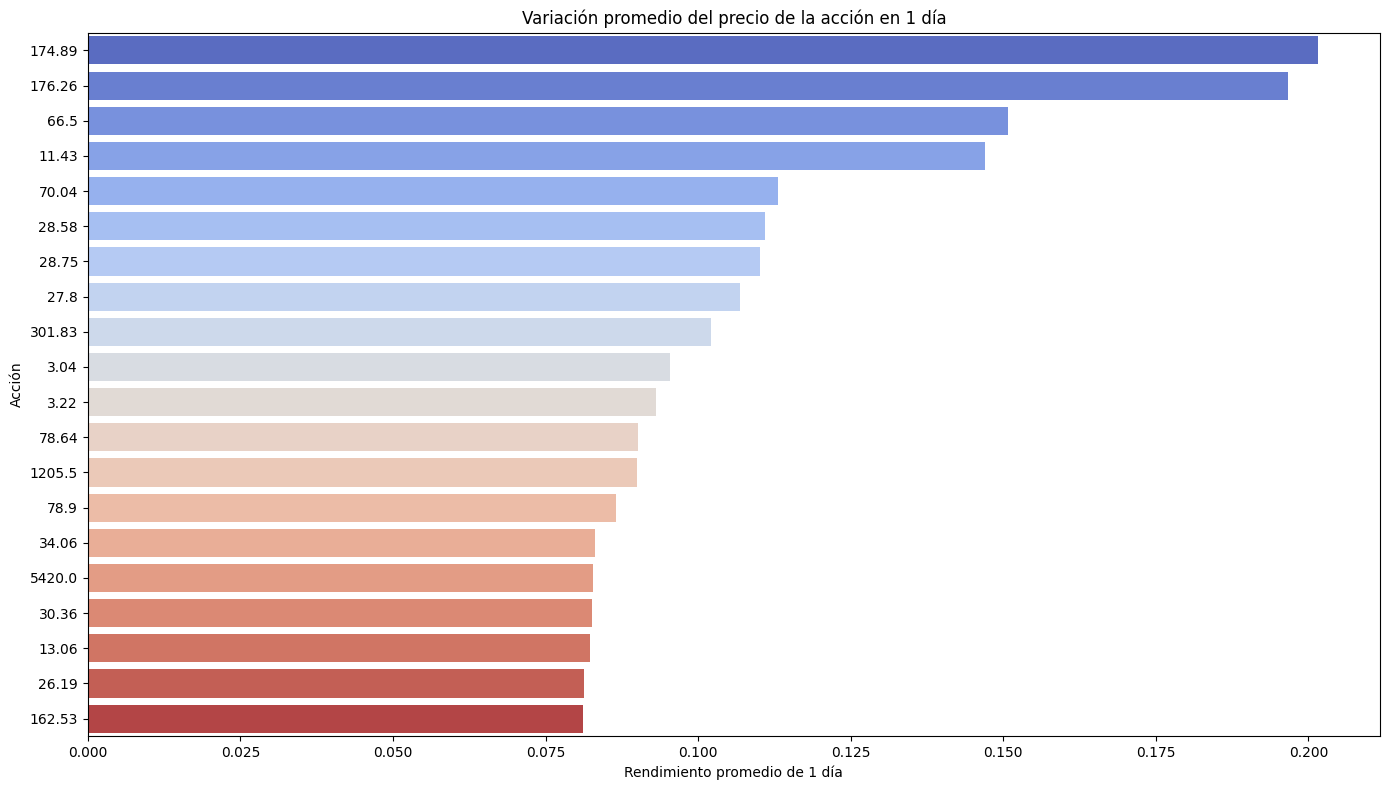

,STOCK,1_DAY_RETURN
709,174.89,0.201641
715,176.26,0.196585
2071,66.5,0.150827
146,11.43,0.146982
2138,70.04,0.113078
1234,28.58,0.110917
1235,28.75,0.110083
1222,27.8,0.106924
1290,301.83,0.102177
1254,3.04,0.095395


In [ ]:
## Calculamos el promedio de un día de la acción
average_returns = dataframe.groupby('STOCK')['1_DAY_RETURN'].mean().reset_index()

average_returns = average_returns.sort_values(by='1_DAY_RETURN', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='1_DAY_RETURN', y='STOCK', data=average_returns.head(20), palette='coolwarm') # Mostrar las 20 principales para mayor claridad
plt.title('Variación promedio del precio de la acción en 1 día')
plt.xlabel('Rendimiento promedio de 1 día')
plt.ylabel('Acción')
plt.tight_layout()
plt.show()

display(average_returns.head(20))

#NLTK

A partir de ahora tomaremos la columna de TWEET para aplicar Procesamiento de Lenguaje Natural con el objetivo de verificar el contenido de los mismos y poderlo modelar.


Importamos  las librerias necesarias para aplicar  NLTK


In [ ]:
import nltk

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab', quiet=True)

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


Aplicamos cuatro tecnicas para procesar textos.

*   Quitar símbolos y signos de puntuación
*   Tokenización
*   Eliminación de stopwords.
*   Lematización


In [ ]:
import re

def remove_punctuation(text):
    if pd.isna(text):
        return ""
    text = str(text).lower() # Asegura que el texto sea una cadena y conviértelo a minúsculas
    # Eliminar caracteres no alfanuméricos (mantener letras y números, reemplazar otros con un espacio)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip() # Eliminar espacios iniciales/finales

dataframe['TWEET_NO_PUNCT'] = dataframe['TWEET'].apply(remove_punctuation)
display(dataframe[['TWEET', 'TWEET_NO_PUNCT']].head())

,TWEET,TWEET_NO_PUNCT
2,@FAME95FM1 Jamaicans make money with @Payoneer...,fame95fm1 jamaicans make money with payoneer p...
3,@CBSi Jamaicans make money with @Payoneer @Pay...,cbsi jamaicans make money with payoneer paypal...
4,@Hitz92fm Jamaicans make money with @Payoneer ...,hitz92fm jamaicans make money with payoneer pa...
11,"RT @nikitakhara: Thank you, @Starbucks CEO for...",rt nikitakhara thank you starbucks ceo for com...
20,@gawker Jamaicans make money with @Payoneer @P...,gawker jamaicans make money with payoneer payp...


Ahora aplicaremos la Tokenizacíon que se realiza para separ cada palabra en un objeto independiente.

In [ ]:
import nltk

def tokenize_text(text):
    if pd.isna(text):
        return []
    return nltk.word_tokenize(text)

dataframe['TWEET_TOKENIZED'] = dataframe['TWEET_NO_PUNCT'].apply(tokenize_text)
display(dataframe[['TWEET_NO_PUNCT', 'TWEET_TOKENIZED']].head())

,TWEET_NO_PUNCT,TWEET_TOKENIZED
2,fame95fm1 jamaicans make money with payoneer p...,"[fame95fm1, jamaicans, make, money, with, payo..."
3,cbsi jamaicans make money with payoneer paypal...,"[cbsi, jamaicans, make, money, with, payoneer,..."
4,hitz92fm jamaicans make money with payoneer pa...,"[hitz92fm, jamaicans, make, money, with, payon..."
11,rt nikitakhara thank you starbucks ceo for com...,"[rt, nikitakhara, thank, you, starbucks, ceo, ..."
20,gawker jamaicans make money with payoneer payp...,"[gawker, jamaicans, make, money, with, payonee..."


Con STOPWORDS quitamos las palabras que no le agregan significado al mensaje como por ejemplo "you", "for" en la fila 11.

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    if not isinstance(tokens, list):
        return []
    return [word for word in tokens if word not in stop_words]

dataframe['TWEET_NO_STOPWORDS'] = dataframe['TWEET_TOKENIZED'].apply(remove_stopwords)
display(dataframe[['TWEET_TOKENIZED', 'TWEET_NO_STOPWORDS']].head())

,TWEET_TOKENIZED,TWEET_NO_STOPWORDS
2,"[fame95fm1, jamaicans, make, money, with, payo...","[fame95fm1, jamaicans, make, money, payoneer, ..."
3,"[cbsi, jamaicans, make, money, with, payoneer,...","[cbsi, jamaicans, make, money, payoneer, paypa..."
4,"[hitz92fm, jamaicans, make, money, with, payon...","[hitz92fm, jamaicans, make, money, payoneer, p..."
11,"[rt, nikitakhara, thank, you, starbucks, ceo, ...","[rt, nikitakhara, thank, starbucks, ceo, commi..."
20,"[gawker, jamaicans, make, money, with, payonee...","[gawker, jamaicans, make, money, payoneer, pay..."


Finalmente aplicamos la Lemmatizacion de las palabras para volverlas a su palabra de raíz.

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    if not isinstance(tokens, list):
        return []
    return [lemmatizer.lemmatize(word) for word in tokens]

dataframe['TWEET_LEMMATIZED'] = dataframe['TWEET_NO_STOPWORDS'].apply(lemmatize_words)
display(dataframe[['TWEET_NO_STOPWORDS', 'TWEET_LEMMATIZED']].head())

,TWEET_NO_STOPWORDS,TWEET_LEMMATIZED
2,"[fame95fm1, jamaicans, make, money, payoneer, ...","[fame95fm1, jamaican, make, money, payoneer, p..."
3,"[cbsi, jamaicans, make, money, payoneer, paypa...","[cbsi, jamaican, make, money, payoneer, paypal..."
4,"[hitz92fm, jamaicans, make, money, payoneer, p...","[hitz92fm, jamaican, make, money, payoneer, pa..."
11,"[rt, nikitakhara, thank, starbucks, ceo, commi...","[rt, nikitakhara, thank, starbucks, ceo, commi..."
20,"[gawker, jamaicans, make, money, payoneer, pay...","[gawker, jamaican, make, money, payoneer, payp..."


A partir de ahora tomamos la columna TWEET_LEMMATIZED y aplicamos un analisis de sentimiento.Para eso utilizaremos VADER de NLTK, agregando nuevas columnas para puntajes de sentimiento compuestos, positivos, negativos y neutrales.

## Importar el analizador de sentimiento VADER


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


## Inicializar VADER y analizar sentimiento



In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el léxico de VADER si no está disponible
try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon', quiet=True)

# Inicializar el analizador de sentimiento VADER
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_scores(tokens):
    if not tokens:
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

    # Unir los tokens lematizados en una sola cadena
    text = " ".join(tokens)

    # Obtener puntuaciones de sentimiento VADER
    return analyzer.polarity_scores(text)


El siguiente paso es aplicar esta función a la columna 'TWEET_LEMMATIZED' del marco de datos y extraer los puntajes de sentimiento compuestos, positivos, negativos y neutrales en columnas nuevas


In [ ]:
sentiment_scores = dataframe['TWEET_LEMMATIZED'].apply(vader_sentiment_scores)

dataframe['VADER_COMPOUND'] = sentiment_scores.apply(lambda x: x['compound'])
dataframe['VADER_NEG'] = sentiment_scores.apply(lambda x: x['neg'])
dataframe['VADER_NEU'] = sentiment_scores.apply(lambda x: x['neu'])
dataframe['VADER_POS'] = sentiment_scores.apply(lambda x: x['pos'])

print("Puntuaciones de sentimiento VADER (compuesto, negativo, neutral, positivo) añadidas al dataframe.")
display(dataframe[['TWEET_LEMMATIZED', 'VADER_COMPOUND', 'VADER_NEG', 'VADER_NEU', 'VADER_POS']].head())

Puntuaciones de sentimiento VADER (compuesto, negativo, neutral, positivo) añadidas al dataframe.


,TWEET_LEMMATIZED,VADER_COMPOUND,VADER_NEG,VADER_NEU,VADER_POS
2,"[fame95fm1, jamaican, make, money, payoneer, p...",0.0000,0.0,1.000,0.000
3,"[cbsi, jamaican, make, money, payoneer, paypal...",0.0000,0.0,1.000,0.000
4,"[hitz92fm, jamaican, make, money, payoneer, pa...",0.0000,0.0,1.000,0.000
11,"[rt, nikitakhara, thank, starbucks, ceo, commi...",0.6908,0.0,0.573,0.427
20,"[gawker, jamaican, make, money, payoneer, payp...",0.0000,0.0,1.000,0.000


Ahora para una mejor visualizacion, generaremos una nube de palabras por empresa mensionada. Usaremos de ejemplo "NIKE", pero modificando la compañia podremos los datos deseados.

In [ ]:
company_name = 'Nike'
print(f"Company name selected for filtering: {company_name}")

Company name selected for filtering: Nike


In [ ]:
company_tweets_df = dataframe[dataframe['STOCK'].str.contains(company_name, case=False, na=False)]
print(f"Número de tweets para {company_name}: {company_tweets_df.shape[0]}")
display(company_tweets_df.head())

Número de tweets para Nike: 3797


,Unnamed: 0,TWEET,STOCK,DATE,LAST_PRICE,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,PX_VOLUME,...,TEXTBLOB_POLARITY,MENTION,TWEET_NO_PUNCT,TWEET_TOKENIZED,TWEET_NO_STOPWORDS,TWEET_LEMMATIZED,VADER_COMPOUND,VADER_NEG,VADER_NEU,VADER_POS
588,350,@colettey6 @Nike I don't do any of those thing...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,...,-0.8,@Nike,colettey6 nike i dont do any of those things a...,"[colettey6, nike, i, dont, do, any, of, those,...","[colettey6, nike, dont, things, anyway, hate, ...","[colettey6, nike, dont, thing, anyway, hate, s...",0.3814,0.08,0.747,0.172
1006,599,RT @highsnobiety: You might actually be able t...,Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,...,0.5,@Nike,rt highsnobiety you might actually be able to ...,"[rt, highsnobiety, you, might, actually, be, a...","[rt, highsnobiety, might, actually, able, cop,...","[rt, highsnobiety, might, actually, able, cop,...",0.0000,0.00,1.000,0.000
1811,1080,"RT @TuriaPitt: This is classic! No excuses, no...",Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,...,0.2083333333333333,@Nike,rt turiapitt this is classic no excuses not ev...,"[rt, turiapitt, this, is, classic, no, excuses...","[rt, turiapitt, classic, excuses, even, age, n...","[rt, turiapitt, classic, excuse, even, age, ni...",0.0772,0.00,0.843,0.157
1945,1163,"RT @walmyrcarvalho: Hey @Nike, your push syste...",Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,...,0.75,@Nike,rt walmyrcarvalho hey nike your push system is...,"[rt, walmyrcarvalho, hey, nike, your, push, sy...","[rt, walmyrcarvalho, hey, nike, push, system, ...","[rt, walmyrcarvalho, hey, nike, push, system, ...",0.4215,0.00,0.811,0.189
1993,1192,"RT @BoF: In 2016, @Nike overtook @LouisVuitton...",Nike,31/01/2017,52.9,0.003403,0.005482,0.005482,0.010397,12342873.0,...,0.5,@Nike,rt bof in 2016 nike overtook louisvuitton as t...,"[rt, bof, in, 2016, nike, overtook, louisvuitt...","[rt, bof, 2016, nike, overtook, louisvuitton, ...","[rt, bof, 2016, nike, overtook, louisvuitton, ...",0.4767,0.00,0.780,0.220


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combinar todas las palabras lematizadas de la empresa seleccionada en una sola cadena
all_words = ' '.join([' '.join(tokens) for tokens in company_tweets_df['TWEET_LEMMATIZED']])


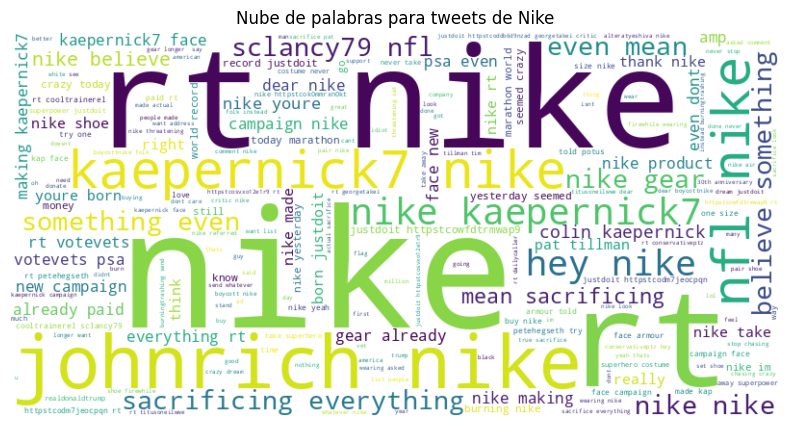

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nube de palabras para tweets de {company_name}')
plt.show()


## Categorizar Sentimiento para Tweets de Nike

### Subtask:
Crearemos una nueva columna en el DataFrame `company_tweets_df` para categorizar el sentimiento general (`VADER_COMPOUND`) de los tweets de 'Nike' en 'Positive', 'Negative' o 'Neutral' usando umbrales estándar.


Definimos una función para categorizar los puntajes de sentimiento y luego la aplicaré a la columna VADER_COMPOUND del DataFrame company_tweets_df para crear la nueva columna VADER_SENTIMENT_CATEGORY.
Definiremos un valor mayor a 0,05 como positivo, un valor menor a 0,05 como negativo y los valores intermedio como neutral.


In [ ]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

company_tweets_df['VADER_SENTIMENT_CATEGORY'] = company_tweets_df['VADER_COMPOUND'].apply(categorize_sentiment)

print("Categorización de sentimiento aplicada a 'company_tweets_df'.")
display(company_tweets_df[['TWEET', 'VADER_COMPOUND', 'VADER_SENTIMENT_CATEGORY']].head())

Categorización de sentimiento aplicada a 'company_tweets_df'.


/tmp/ipython-input-3060609029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_tweets_df['VADER_SENTIMENT_CATEGORY'] = company_tweets_df['VADER_COMPOUND'].apply(categorize_sentiment)


,TWEET,VADER_COMPOUND,VADER_SENTIMENT_CATEGORY
588,@colettey6 @Nike I don't do any of those thing...,0.3814,Positive
1006,RT @highsnobiety: You might actually be able t...,0.0000,Neutral
1811,"RT @TuriaPitt: This is classic! No excuses, no...",0.0772,Positive
1945,"RT @walmyrcarvalho: Hey @Nike, your push syste...",0.4215,Positive
1993,"RT @BoF: In 2016, @Nike overtook @LouisVuitton...",0.4767,Positive


In [ ]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Asegurarse de que company_tweets_df sea una copia independiente para evitar SettingWithCopyWarning
company_tweets_df = company_tweets_df.copy()

company_tweets_df['VADER_SENTIMENT_CATEGORY'] = company_tweets_df['VADER_COMPOUND'].apply(categorize_sentiment)

print("Categorización de sentimiento aplicada a 'company_tweets_df'.")
display(company_tweets_df[['TWEET', 'VADER_COMPOUND', 'VADER_SENTIMENT_CATEGORY']].head())

Categorización de sentimiento aplicada a 'company_tweets_df'.


,TWEET,VADER_COMPOUND,VADER_SENTIMENT_CATEGORY
588,@colettey6 @Nike I don't do any of those thing...,0.3814,Positive
1006,RT @highsnobiety: You might actually be able t...,0.0000,Neutral
1811,"RT @TuriaPitt: This is classic! No excuses, no...",0.0772,Positive
1945,"RT @walmyrcarvalho: Hey @Nike, your push syste...",0.4215,Positive
1993,"RT @BoF: In 2016, @Nike overtook @LouisVuitton...",0.4767,Positive


**Reasoning**:
Now that the sentiment categories have been added to the DataFrame, I will count the occurrences of each sentiment ('Positive', 'Negative', 'Neutral') in the `VADER_SENTIMENT_CATEGORY` column to understand the distribution.



In [ ]:
sentiment_counts = company_tweets_df['VADER_SENTIMENT_CATEGORY'].value_counts()

print("Conteo de tweets por categoría de sentimiento:")
display(sentiment_counts)

Conteo de tweets por categoría de sentimiento:


,count
VADER_SENTIMENT_CATEGORY,
Positive,1608
Neutral,1120
Negative,1069


Representamos en un grafico la cantidad de menciones positivas, negativas o neutral de la accion seleccionada.



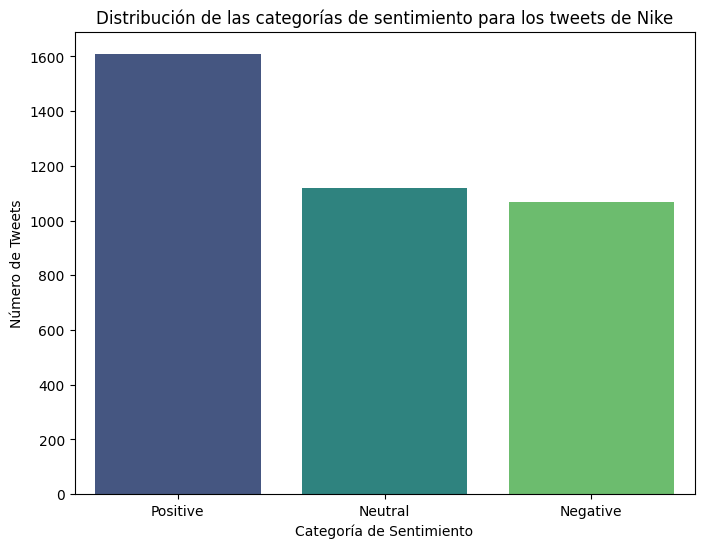

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis', hue=sentiment_counts.index, legend=False)
plt.title(f'Distribución de las categorías de sentimiento para los tweets de {company_name}')
plt.xlabel('Categoría de Sentimiento')
plt.ylabel('Número de Tweets')
plt.show()



# APLICAMOS EL MODELO TF-IDF


Utilizar `TfidfVectorizer` de scikit-learn para transformar la columna `TWEET_LEMMATIZED` en una representación numérica TF-IDF. Esto se realiza para determinar la importancia de las palabras dentro de la cadena de comentarios.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Unir los tokens lematizados de nuevo en cadenas para el Vectorizador TF-IDF
dataframe['TWEET_LEMMATIZED_STR'] = dataframe['TWEET_LEMMATIZED'].apply(lambda x: ' '.join(x))

# Inicializar TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Considerar las 5000 características principales

# Ajustar y transformar los tweets lematizados
tfidf_matrix = tfidf_vectorizer.fit_transform(dataframe['TWEET_LEMMATIZED_STR'])

# Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF aplicado y matriz creada.")
display(tfidf_df.head())

TF-IDF aplicado y matriz creada.


,01082018,01092018,01102018,02082018,02092018,02102018,03082018,03092018,0311,04082018,...,yr,yup,yutonagatomo5,zaha,zero,zippo,zombie,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# MODELO APLICANDO DEEP LEARNING

Entrenaremos y evaluaremos un modelo aplicando un modelo de  deep learning para los sentimientos de las publicaciones.
Para ellos definiremos un modelo secuencial de Keras.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## Preparar los datos para el modelo de Deep Learning

Primero, definiremos las características de entrada (X) y la variable objetivo (y). Las características de entrada serán las puntuaciones de sentimiento VADER, y la variable objetivo será el retorno de un día de la acción.

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = dataframe[['VADER_COMPOUND', 'VADER_NEG', 'VADER_NEU', 'VADER_POS']]
y = dataframe['1_DAY_RETURN']

# Verificar que no haya valores nulos en X o y
print(f"Nulos en X:\n{X.isnull().sum()}")
print(f"Nulos en y:\n{y.isnull().sum()}")

# Escalar las características de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos X escalados.")
print(f"Dimensiones de X_scaled: {X_scaled.shape}")
print(f"Dimensiones de y: {y.shape}")

Nulos en X:
VADER_COMPOUND    0
VADER_NEG         0
VADER_NEU         0
VADER_POS         0
dtype: int64
Nulos en y:
0
Datos X escalados.
Dimensiones de X_scaled: (66655, 4)
Dimensiones de y: (66655,)


## Dividir los datos en conjuntos de entrenamiento y prueba

Dividiremos los datos escalados en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo en datos no vistos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (53324, 4)
Dimensiones de X_test: (13331, 4)
Dimensiones de y_train: (53324,)
Dimensiones de y_test: (13331,)


## Construir el modelo de Deep Learning (Keras)

Definiremos un modelo secuencial de Keras con capas densas para predecir el retorno de la acción. El modelo tendrá una capa de entrada, una o varias capas ocultas y una capa de salida.

In [ ]:
# Definir el modelo de Keras
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida para regresión (una sola neurona, sin activación para salida lineal)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

model.summary()
print("Modelo de Deep Learning de Keras construido y compilado.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

Modelo de Deep Learning de Keras construido y compilado.


## Entrenar el modelo

Entrenaremos el modelo utilizando los datos de entrenamiento.

Modelo entrenado.


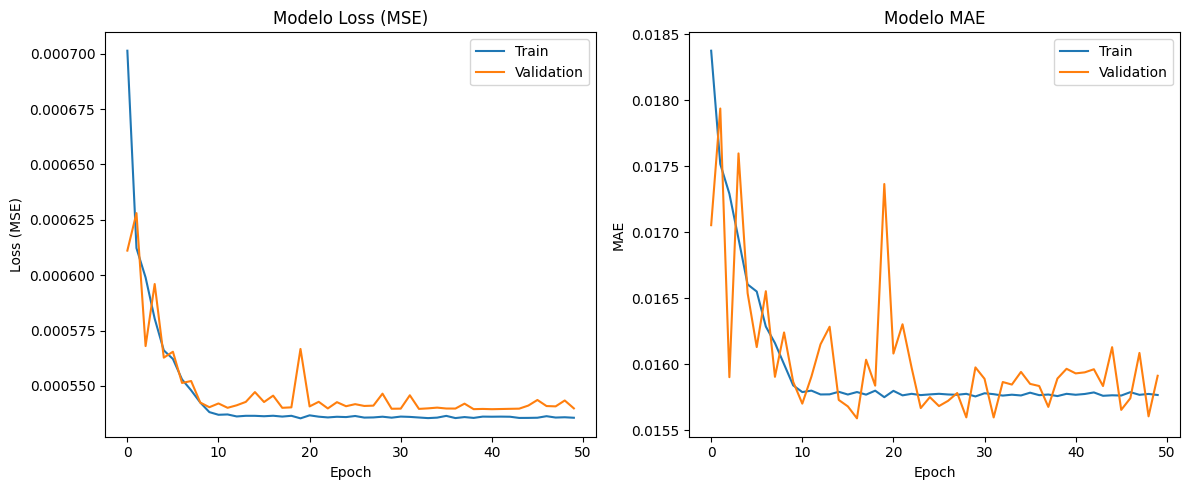

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

print("Modelo entrenado.")

# Graficar el historial de entrenamiento para MSE y MAE
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo Loss (MSE)')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Modelo MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

## Evaluar el modelo

Evaluaremos el rendimiento del modelo en el conjunto de prueba y calcularemos métricas como el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²).

Métricas de evaluación en el conjunto de prueba:
  Loss (MSE): 0.0005
  MAE: 0.0157
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
  R-cuadrado: 0.0057


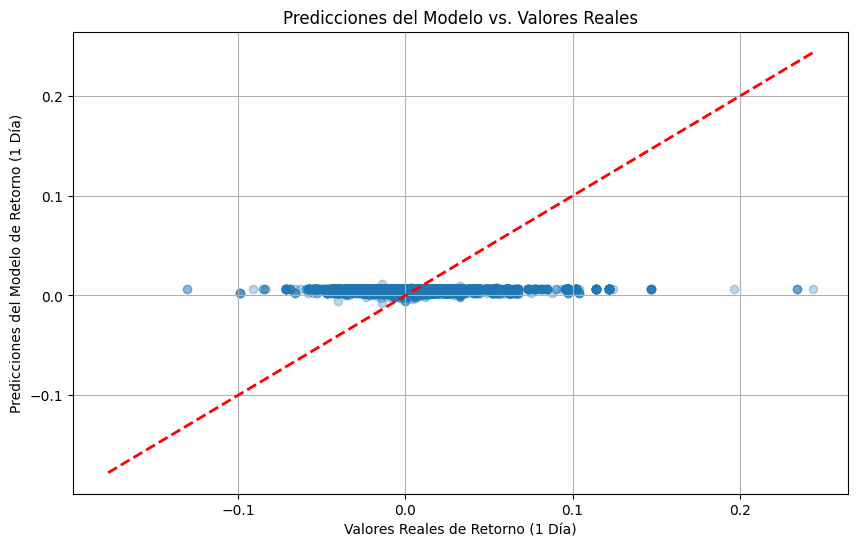

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Métricas de evaluación en el conjunto de prueba:")
print(f"  Loss (MSE): {mse:.4f}")
print(f"  MAE: {mae:.4f}")

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular R-cuadrado
r2 = r2_score(y_test, y_pred)
print(f"  R-cuadrado: {r2:.4f}")

# Visualizar las predicciones vs. los valores reales (muestra)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Línea de referencia y=x
plt.xlabel('Valores Reales de Retorno (1 Día)')
plt.ylabel('Predicciones del Modelo de Retorno (1 Día)')
plt.title('Predicciones del Modelo vs. Valores Reales')
plt.grid(True)
plt.show()



#CONCLUSIÓN

Se verifica que el impacto de los comentarios en la red social Twitter no impactan de forma significativa en el precio de las acciones. Esto lo podemos ver en los valores muy bajos del R2 y el MSE del modelo de DEEP LEARNING implementado. Dado estos resultados damos como imcumplida nuestra hipotesis.  